# Exercício 06
## Teste de Hipótese
### Alunos:

- Fernanda Tostes Marana (4471070)
- Matheus Aparecido do Carmo Alves (9791114)
- Thais Bianchini (9791010)

---


## Objetivos da prática:
- Utilizar testes estatísticos para selecionar um modelo
- Utilizar ferramentas visuais para avaliar modelos


---

## Funções novas utilizadas no exercício

- `pandas.Series.nunique()` ([link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html)): Conta quantidade de valores únicos de uma coluna. Útil para verificar se uma coluna é relevante ou não
- `scipy.stats.ttest_rel()` ([link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)): Calcula o teste t para duas amostras
- `scipy.stats` ([link](https://docs.scipy.org/doc/scipy/reference/stats.html)) Implementações de alguns testes estatísticos
- `sklearn.metrics.plot_roc_curve()` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html)): Plota a curva ROC de um classificador dado um conjunto de input e alvo





---

Nesse exercício utilizaremos o dataset [Titanic](https://www.kaggle.com/c/titanic/overview) disponível no arquivo `titanic.csv`. Ele é um dataset de classificação binário, onde o objetivo é prever se um dado passageiro do titanic sobreviveu ou não ao naufrágio. Informações sobre os atributos podem ser vistas [aqui](https://www.kaggle.com/c/titanic/data)

---


**IMPORTS**

In [1]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Questão 01.

Faça a exploração dos dados. Isto é, carregue, substitua valores faltantes, padronize os dados, etc. Faça também a seleção dos atributos que achar mais relevantes. 

 - Dica: Tente utilizar a função `nunique()` durante a exploração dos dados. Você também pode utilizar o "bom senso" (além de outras ferramentas é claro) na hora de escolher qual atributo do conjunto manter

**RESPOSTA**

Primeiramente, o conjunto de dados foi carregado e uma breve análise foi feita.

In [2]:
# Carregando o dataset
dataset = pd.read_csv('titanic.csv')
display(dataset)

# Contando os valores faltantes
print('Número de valores faltantes:',dataset.isnull().sum().sum())

# Analisando os elementos únicos e seus tipos no conjunto de dados
print(dataset.nunique())
print(dataset.dtypes)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Número de valores faltantes: 866
PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Observando o conjunto parcial dos dados apresentado, nota-se que este possui dados numéricos e em formato de texto.
Desta forma a primeira etapa de pré-processamento será a transformação dos dados textuais em dados numéricos, visando facilitar, posteriormente, a aplicação de técnicas de aprendizado e análise sobre os dados.

Contudo, para realizar este pré-processamento é necessário realizar a substituição dos valores faltantes no conjunto de texto.
Desta forma, optou-se, nesta aplicação, realizar a categorização dos valores faltantes, criando um valor único que o represente.

In [3]:
# Selecionando as colunas não numéricas
not_numeric_cols = dataset.select_dtypes(include=['object']).copy()

# Categorizando os valores faltantes
not_numeric_cols = not_numeric_cols.fillna('NaN')

# Inicializando o encoder e realizando a transformação
encoder = LabelEncoder()
for col in not_numeric_cols:
    dataset[col] = encoder.fit_transform(not_numeric_cols[col])
display(dataset)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,146,3
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,146,3
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,3
4,5,0,3,15,1,35.0,0,0,472,8.0500,146,3
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,146,3
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,3
888,889,0,3,413,0,NaN,1,2,675,23.4500,146,3
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


Feito isto, a segunda etapa do pré-processamento refere-se ao processamento dos dados numéricos.
Os valores faltantes foram substituidos pela mediana da coluna o qual este se apresenta.

In [4]:
# Substituindo os valores faltantes
for col in dataset:
    dataset[col].fillna(dataset[col].median(), inplace = True)
display(dataset)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,146,3
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,146,3
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,3
4,5,0,3,15,1,35.0,0,0,472,8.0500,146,3
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,146,3
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,3
888,889,0,3,413,0,28.0,1,2,675,23.4500,146,3
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


Por fim, uma normalização foi aplicada sobre os dados visando aumentar a taxa de aprendizado sobre o conjunto de dados pela padronização de pesos.

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(np.column_stack((dataset.iloc[:,0:1],dataset.iloc[:,2:])))
y = np.array(dataset.iloc[:,1])



---

### Questão 02.

Utilize o 10-fold cross-validation para calcular a acurácia dos classificadores abaixo. Armazene a acurácia calculada em cada fold na variavel `scores` para cada um dos modelos.


In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

classificadores = {
  "Perceptron" : {"modelo": Perceptron(), "scores": []},
  "Multi-Layer Perceptron (15,)" : {"modelo": MLPClassifier(random_state=1, hidden_layer_sizes=(15,), max_iter=2000), "scores": []},
  "SVM Polinomial Grau 3" : {"modelo": SVC(kernel='poly', degree=3, gamma=1), "scores": []},
  "Árvore Decisão Critério Gini" : {"modelo": DecisionTreeClassifier(criterion='gini'), "scores": []},  
  "KNN k=5" : {"modelo": KNeighborsClassifier(n_neighbors=5), "scores": []}
}
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import cross_validate
for modelo in classificadores:
    classificadores[modelo]["modelo"].fit(X,y)
    classificadores[modelo]["scores"] =\
        cross_validate(classificadores[modelo]["modelo"],X,y,cv=10)['test_score']
    print(modelo,':',np.mean(classificadores[modelo]["scores"]))

Perceptron : 0.7239076154806492
Multi-Layer Perceptron (15,) : 0.8069662921348314
SVM Polinomial Grau 3 : 0.7766042446941323
Árvore Decisão Critério Gini : 0.783458177278402
KNN k=5 : 0.7935081148564294




---

### Questão 03.

Selecione os dois melhores classificadores e verifique se há diferença estatística significante entre suas acurácias utilizando o teste T (`scipy.stats.ttest_rel`). Você pode utilizar outro tipo de teste, desde que faça a justificativa. Considere que há diferença significante se p <= 0.05 (rejeita-se a hipótese nula)

- Nesse [link](https://machinelearningmastery.com/statistical-significance-tests-for-comparing-machine-learning-algorithms/) o autor discute alguns pontos interessantes para se escolher um teste estatístico
- No [link](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/) é feito um sumário dos testes implementados no scipy

**RESPOSTA**

Observando os resultados médios, temos que os melhores classificadores são:

1. Multi-Layer Perceptron (15,)
2. KNN k=5
3. Árvore Decisão Critério Gini

Realizando a análise p-test, os resultados são:

In [7]:
for modelo_a in ['Árvore Decisão Critério Gini','Multi-Layer Perceptron (15,)','KNN k=5']:
    for modelo_b in ['Árvore Decisão Critério Gini','Multi-Layer Perceptron (15,)','KNN k=5']:
        if modelo_a != modelo_b:
            print(modelo_a,'&',modelo_b,'\n\t',stats.ttest_rel(\
                (classificadores[modelo_a]["scores"]),(classificadores[modelo_b]["scores"])))

Árvore Decisão Critério Gini & Multi-Layer Perceptron (15,) 
	 Ttest_relResult(statistic=-2.7487176600436167, pvalue=0.022524014200507602)
Árvore Decisão Critério Gini & KNN k=5 
	 Ttest_relResult(statistic=-0.7863394403291086, pvalue=0.4518752041357291)
Multi-Layer Perceptron (15,) & Árvore Decisão Critério Gini 
	 Ttest_relResult(statistic=2.7487176600436167, pvalue=0.022524014200507602)
Multi-Layer Perceptron (15,) & KNN k=5 
	 Ttest_relResult(statistic=1.3248362858105098, pvalue=0.21787589751795777)
KNN k=5 & Árvore Decisão Critério Gini 
	 Ttest_relResult(statistic=0.7863394403291086, pvalue=0.4518752041357291)
KNN k=5 & Multi-Layer Perceptron (15,) 
	 Ttest_relResult(statistic=-1.3248362858105098, pvalue=0.21787589751795777)


Analisando o p valor resultado da análise, encontramos que nenhum dos valores (resultados médios) são, estatisticamente, significantes.

Assim, não é possível afirmar ou definir qual o melhor método entre os testados.



---

### Questão 04.

Separe o conjunto de dados de maneira estratificada (através do parâmetro `stratify` da função `train_test_split`) em 20% para teste e 80% para treino. Depois plote a curva ROC (`sklearn.metrics.plot_roc_curve`) para **todos** os classificadores (no mesmo gráfico). 

Os melhores classificadores da questão anterior também apresentaram melhor desempenho na curva ROC? O que pode ter ocorrido? Teste diferentes valores de `random_state` na função `train_test_split` e observe o comportamento das curvas.


*   Dica: Para plotar múltiplas curvas ROC no mesmo gráfico, defina uma figura com `fig, ax = plt.subplots()` e passe `ax` como parâmetro da função `plot_roc_curve`. Não se esqueça de passar também o nome do classificador para que o seu gráfico fique mais fácil de interpretar



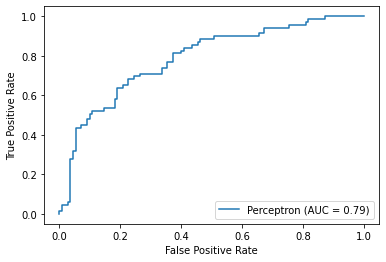

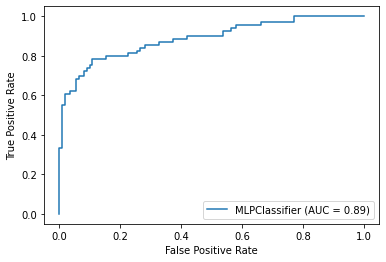

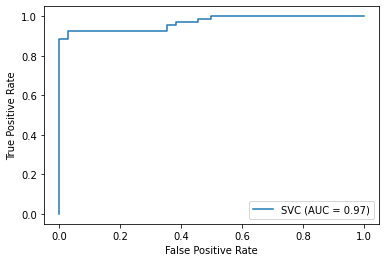

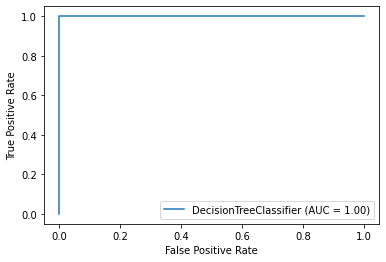

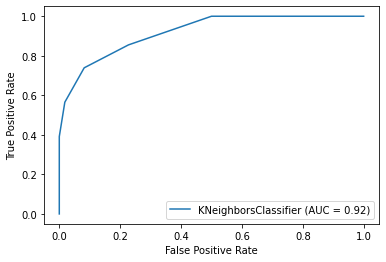

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve
#separando o conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0, stratify = y)

for modelo in classificadores:
  fig, ax = plt.subplots()
  plot_roc_curve(classificadores[modelo]["modelo"], X_test, y_test, ax=ax)
  plt.show()

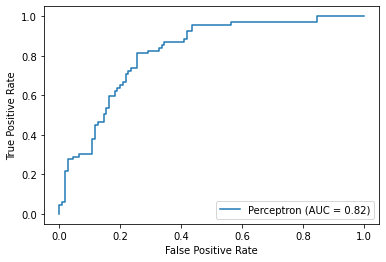

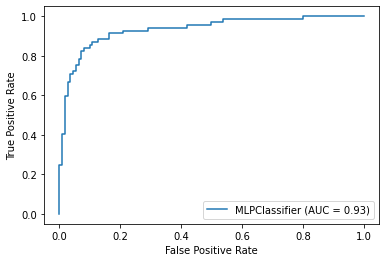

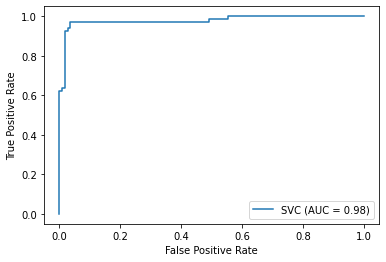

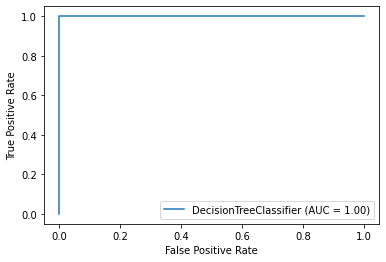

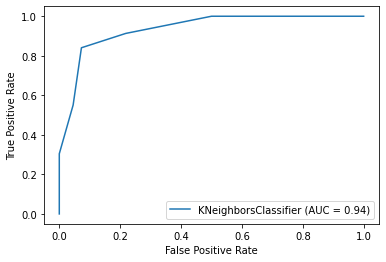

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5, stratify = y)

for modelo in classificadores:
  fig, ax = plt.subplots()
  plot_roc_curve(classificadores[modelo]["modelo"], X_test, y_test, ax=ax)
  plt.show()

Com a generalização do modelo para um modelo estratificado aleatório, não é possível ver a diferença de um método para o outro. Mas usando uma aleatorização fixa, é possível observar a melhoria de alguns métodos para outros.



---

### Questão 05.

Agora utilize a função `plot_roc` definida abaixo para o modelo com maior e menor acurácia (de acordo como você calculou na questão 02). Essa função irá calcular a curva ROC utilizando 10-fold cross-validation, exibindo a curva média bem como as curvas para cada fold. Comente se agora o resultado foi conforme o esperado.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

def plot_roc(classifier, X, y):
  cv = StratifiedKFold(n_splits=10)  

  if isinstance(X, pd.core.frame.DataFrame):
    X = X.values
  if isinstance(y, pd.core.frame.DataFrame) or isinstance(y, pd.core.series.Series):
    y = y.values

  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)

  fig, ax = plt.subplots()
  for i, (train, test) in enumerate(cv.split(X, y)):
      classifier.fit(X[train], y[train])
      viz = plot_roc_curve(classifier, X[test], y[test],
                          name='ROC fold {}'.format(i),
                          alpha=0.3, lw=1, ax=ax)
      interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
      interp_tpr[0] = 0.0
      tprs.append(interp_tpr)
      aucs.append(viz.roc_auc)  

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(mean_fpr, mean_tpr)
  std_auc = np.std(aucs)
  ax.plot(mean_fpr, mean_tpr, color='b',
          label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
          lw=2, alpha=.8)

  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                  label=r'$\pm$ 1 std. dev.')

  ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
        title="Receiver operating characteristic example")
  ax.legend(loc="lower right")
  plt.show()

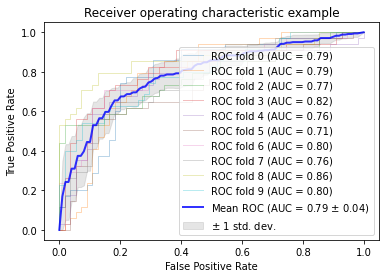

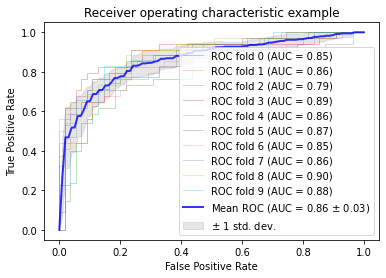

In [11]:
plot_roc(classificadores["Perceptron"]["modelo"],X,y)
plot_roc(classificadores["Multi-Layer Perceptron (15,)"]["modelo"],X,y)

Como esperado, a curva ROC apresentado pelo método de menor acurácia apresenta uma curva mais próxima ao eixo diagonal do gráfico (indicando, exatamente, esta caracteristica, além de um maior grau de especificadade e menor sensibilidade). 
Já para o método de maior acurácia, a curva se encontra mais próxima ao canto superior esquerdo do gráfico, com uma taxa maior de sensibilidade em comparação à especificidade.



---

### Questão bônus:

Para essa questão você deve testar o seu algoritmo em um conjunto de dados nunca visto através do site [Kaggle](https://www.kaggle.com/c/titanic/overview). A ideia é prever as classes dos dados do arquivo `questao_extra.csv` e submeter o resultado no Kaggle, para que o mesmo faça a avaliação.

O arquivo que você deverá submeter no site deverá conter apenas a coluna "PassegerID" e "Survived" (há um arquivo de submissão de exemplo na pasta do exercício). Na figura abaixo podemos ver a distribuição de performance dos participantes dessa competição.

Note que nessa questão você deve treinar o seu classificador com todos os dados disponíveis (ou seja, todos os dados do arquivo `titanic.csv`).

**Reporte o seu resultado aqui para eu saber o quão bem vocês foram!**

*   Dica: Você pode gerar um arquivo csv a partir de um `DataFrame` com a função `pandas.DataFrame.to_csv`. Lembre-se de passar `index=False`

![alt text](http://playagricola.com/Kaggle/first.png)





